In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def classify_landing_outcome(outcome):
    if outcome in ['True Ocean', 'True RTLS', 'True ASDS']:
        return 1
    else:
        return 0

df = pd.read_csv('dataset_space_API_past_launches_raw.csv')
falcon_9_df = df[df['BoosterVersion'] == 'Falcon 9']
falcon_9_df['PayloadMass'].fillna(falcon_9_df['PayloadMass'].mean(), inplace=True)
# Apply the function to the Outcome column to create a new column 'LandingOutcome'
falcon_9_df['LandingOutcome'] = falcon_9_df['Outcome'].apply(classify_landing_outcome)

# Check the resulting DataFrame
falcon_9_df

D:\study\conda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\59704\AppData\Local\Temp/ipykernel_1642932/1201591775.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['LandingOutcome'] = falcon_9_df['Outcome'].apply(classify_landing_outcome)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingOutcome
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
90,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058,1
91,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
92,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [2]:
# Perform Exploratory Data Analysis (EDA) on the Falcon 9 data

# Calculate success rate for each launch site
launch_site_success_rate = falcon_9_df.groupby('LaunchSite')['LandingOutcome'].mean()

# Range of payload mass for each launch site
payload_mass_range_per_site = falcon_9_df.groupby('LaunchSite')['PayloadMass'].agg([min, max])

# Success rate for each orbit type
orbit_success_rate = falcon_9_df.groupby('Orbit')['LandingOutcome'].mean()

# Relationship between successful landing and the flight number
success_flight_corr = falcon_9_df[['FlightNumber', 'LandingOutcome']].corr().iloc[0, 1]

# Success rate of payload range for each orbit
# Creating payload mass bins for better analysis
falcon_9_df['PayloadMassBin'] = pd.qcut(falcon_9_df['PayloadMass'], 4)
payload_success_rate_per_orbit = falcon_9_df.groupby(['Orbit', 'PayloadMassBin'])['LandingOutcome'].mean()

# Success rate increase each year
# Extract year from Date and calculate success rate per year
falcon_9_df['Year'] = pd.to_datetime(falcon_9_df['Date']).dt.year
yearly_success_rate = falcon_9_df.groupby('Year')['LandingOutcome'].mean()

launch_site_success_rate, payload_mass_range_per_site, orbit_success_rate, success_flight_corr, payload_success_rate_per_orbit, yearly_success_rate


C:\Users\59704\AppData\Local\Temp/ipykernel_1642932/3888197850.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['PayloadMassBin'] = pd.qcut(falcon_9_df['PayloadMass'], 4)
C:\Users\59704\AppData\Local\Temp/ipykernel_1642932/3888197850.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['Year'] = pd.to_datetime(falcon_9_df['Date']).dt.year


(LaunchSite
 CCSFS SLC 40    0.600000
 KSC LC 39A      0.772727
 VAFB SLC 4E     0.769231
 Name: LandingOutcome, dtype: float64,
                  min      max
 LaunchSite                   
 CCSFS SLC 40   350.0  15600.0
 KSC LC 39A    2490.0  15600.0
 VAFB SLC 4E    475.0   9600.0,
 Orbit
 ES-L1    1.000000
 GEO      1.000000
 GTO      0.518519
 HEO      1.000000
 ISS      0.619048
 LEO      0.714286
 MEO      0.666667
 PO       0.666667
 SO       0.000000
 SSO      1.000000
 VLEO     0.857143
 Name: LandingOutcome, dtype: float64,
 0.3959436032624555,
 Orbit  PayloadMassBin    
 ES-L1  (349.999, 2510.75]    1.000000
        (2510.75, 4701.5]          NaN
        (4701.5, 8912.75]          NaN
        (8912.75, 15600.0]         NaN
 GEO    (349.999, 2510.75]         NaN
        (2510.75, 4701.5]          NaN
        (4701.5, 8912.75]     1.000000
        (8912.75, 15600.0]         NaN
 GTO    (349.999, 2510.75]         NaN
        (2510.75, 4701.5]     0.666667
        (4701.5, 8912.

C:\Users\59704\AppData\Local\Temp/ipykernel_1038356/3268719939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['Date'] = pd.to_datetime(falcon_9_df['Date'])
C:\Users\59704\AppData\Local\Temp/ipykernel_1038356/3268719939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['Year'] = falcon_9_df['Date'].dt.year


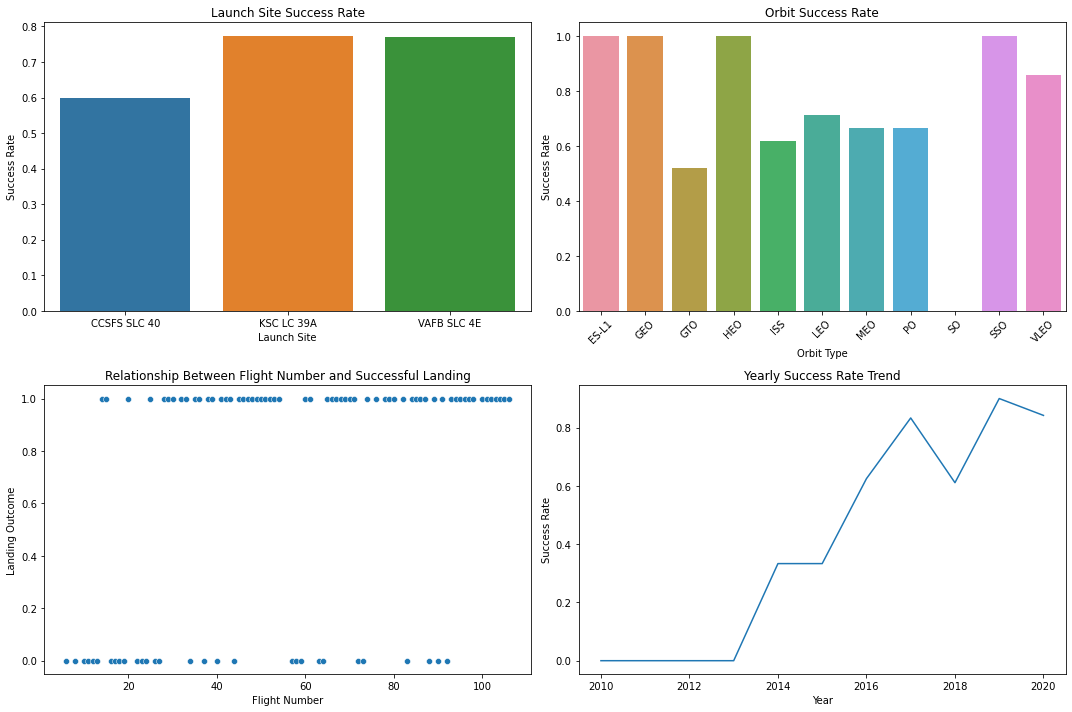

(              count  sum  SuccessRate
 LaunchSite                           
 CCSFS SLC 40     55   33     0.600000
 KSC LC 39A       22   17     0.772727
 VAFB SLC 4E      13   10     0.769231,
                  min      max
 LaunchSite                   
 CCSFS SLC 40   350.0  15600.0
 KSC LC 39A    2490.0  15600.0
 VAFB SLC 4E    475.0   9600.0,
        count  sum  SuccessRate
 Orbit                         
 ES-L1      1    1     1.000000
 GEO        1    1     1.000000
 GTO       27   14     0.518519
 HEO        1    1     1.000000
 ISS       21   13     0.619048
 LEO        7    5     0.714286
 MEO        3    2     0.666667
 PO         9    6     0.666667
 SO         1    0     0.000000
 SSO        5    5     1.000000
 VLEO      14   12     0.857143,
                 FlightNumber  LandingOutcome
 FlightNumber        1.000000        0.395944
 LandingOutcome      0.395944        1.000000,
                              count  sum  SuccessRate
 Orbit PayloadMass                    

In [4]:


# Convert 'Date' to datetime for year extraction
falcon_9_df['Date'] = pd.to_datetime(falcon_9_df['Date'])

# Extract year from 'Date'
falcon_9_df['Year'] = falcon_9_df['Date'].dt.year

# Calculate the success rate for each launch site
launch_site_success_rate = falcon_9_df.groupby('LaunchSite')['LandingOutcome'].agg(['count', 'sum'])
launch_site_success_rate['SuccessRate'] = launch_site_success_rate['sum'] / launch_site_success_rate['count']

# Range of payload mass for each launch site
payload_mass_range = falcon_9_df.groupby('LaunchSite')['PayloadMass'].agg(['min', 'max'])

# Success rate for each orbit type
orbit_success_rate = falcon_9_df.groupby('Orbit')['LandingOutcome'].agg(['count', 'sum'])
orbit_success_rate['SuccessRate'] = orbit_success_rate['sum'] / orbit_success_rate['count']

# Relationship between successful landing and flight number
flight_landing_corr = falcon_9_df[['FlightNumber', 'LandingOutcome']].corr()

# Success rate of payload range for each orbit
payload_orbit_success = falcon_9_df.groupby(['Orbit', pd.cut(falcon_9_df['PayloadMass'], bins=3)])['LandingOutcome'].agg(['count', 'sum'])
payload_orbit_success['SuccessRate'] = payload_orbit_success['sum'] / payload_orbit_success['count']

# Yearly success rate trend
yearly_success_rate = falcon_9_df.groupby('Year')['LandingOutcome'].agg(['count', 'sum'])
yearly_success_rate['SuccessRate'] = yearly_success_rate['sum'] / yearly_success_rate['count']

# Visualization
plt.figure(figsize=(15, 10))

# Launch site success rate
plt.subplot(2, 2, 1)
sns.barplot(x=launch_site_success_rate.index, y='SuccessRate', data=launch_site_success_rate)
plt.title('Launch Site Success Rate')
plt.xlabel('Launch Site')
plt.ylabel('Success Rate')

# Orbit success rate
plt.subplot(2, 2, 2)
sns.barplot(x=orbit_success_rate.index, y='SuccessRate', data=orbit_success_rate)
plt.title('Orbit Success Rate')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)

# Relationship between Flight Number and Successful Landing
plt.subplot(2, 2, 3)
sns.scatterplot(x='FlightNumber', y='LandingOutcome', data=falcon_9_df)
plt.title('Relationship Between Flight Number and Successful Landing')
plt.xlabel('Flight Number')
plt.ylabel('Landing Outcome')

# Yearly success rate trend
plt.subplot(2, 2, 4)
sns.lineplot(x=yearly_success_rate.index, y='SuccessRate', data=yearly_success_rate)
plt.title('Yearly Success Rate Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()

launch_site_success_rate, payload_mass_range, orbit_success_rate, flight_landing_corr, payload_orbit_success, yearly_success_rate


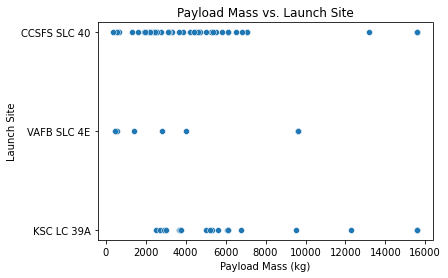

In [5]:

sns.scatterplot(x='PayloadMass', y='LaunchSite', data=falcon_9_df)
plt.title('Payload Mass vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


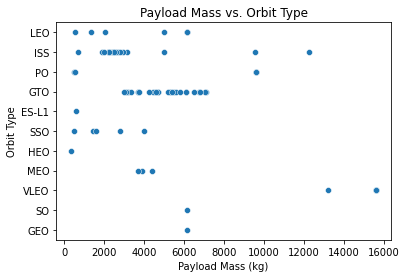

In [6]:
sns.scatterplot(x='PayloadMass', y='Orbit', data=falcon_9_df)
plt.title('Payload Mass vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()


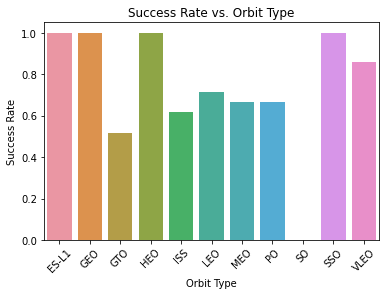

In [7]:
# Calculate success rate for each orbit type
orbit_success = falcon_9_df.groupby('Orbit')['LandingOutcome'].mean().reset_index()

sns.barplot(x='Orbit', y='LandingOutcome', data=orbit_success)
plt.title('Success Rate vs. Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()


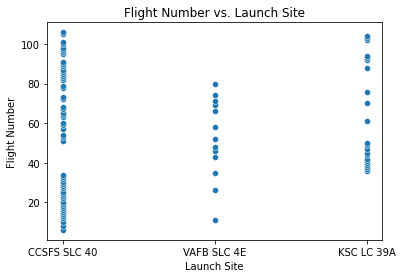

In [8]:
sns.scatterplot(x='LaunchSite', y='FlightNumber', data=falcon_9_df)
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Flight Number')
plt.show()


C:\Users\59704\AppData\Local\Temp/ipykernel_1642932/2593771085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_df['Year'] = pd.to_datetime(falcon_9_df['Date']).dt.year


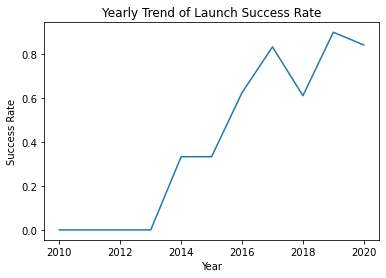

In [12]:
# Extract year from date
falcon_9_df['Year'] = pd.to_datetime(falcon_9_df['Date']).dt.year

# Calculate yearly success rate
yearly_success = falcon_9_df.groupby('Year')['LandingOutcome'].mean().reset_index()

sns.lineplot(x='Year', y='LandingOutcome', data=yearly_success)
plt.title('Yearly Trend of Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()


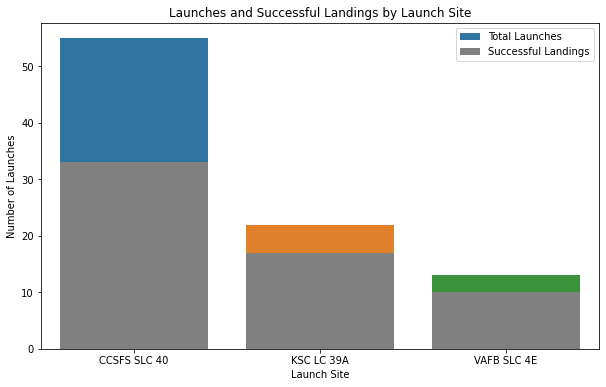

In [22]:
launch_site_stats = falcon_9_df.groupby('LaunchSite')['LandingOutcome'].agg(['count', 'sum'])
plt.figure(figsize=(10, 6))
sns.barplot(x=launch_site_stats.index, y='count', data=launch_site_stats, label='Total Launches')
sns.barplot(x=launch_site_stats.index, y='sum', data=launch_site_stats, label='Successful Landings',color='grey')

plt.title('Launches and Successful Landings by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.legend()
plt.show()